In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("./Data/career_pred.csv")

df

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,yes,yes,yes,shell programming,cloud computing,no,yes,excellent,excellent,cloud computing,system developer,higherstudies,Web Services,no,no,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,yes,no,yes,machine learning,database security,no,no,poor,medium,networks,Business process analyst,job,SAaS services,yes,yes,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,yes,no,yes,app development,web technologies,no,yes,poor,excellent,hacking,developer,higherstudies,Sales and Marketing,yes,yes,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,no,yes,no,python,data science,yes,no,medium,excellent,networks,testing,higherstudies,Testing and Maintainance Services,no,no,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,no,no,no,app development,cloud computing,no,no,poor,excellent,Computer Architecture,testing,higherstudies,product development,no,yes,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,2,6,1,8,yes,no,no,app development,cloud computing,yes,no,poor,excellent,Software Engineering,system developer,job,Testing and Maintainance Services,no,yes,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,8,0,9,8,yes,no,no,full stack,game development,no,yes,medium,excellent,Management,Business process analyst,higherstudies,Product based,yes,yes,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,3,6,2,3,yes,yes,yes,information security,database security,yes,yes,medium,excellent,networks,cloud computing,higherstudies,SAaS services,yes,yes,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,1,4,9,5,no,no,no,full stack,cloud computing,no,yes,poor,poor,IOT,testing,job,Cloud Services,yes,no,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Software Quality Assurance (QA) / Testing


In [3]:
df = df.drop(['Taken inputs from seniors or elders'], axis = 1)

In [4]:
# extracting the values and labels
data = df.iloc[:49,:-1].values
label = df.iloc[:49,-1]

In [5]:
# converting categorical variables into numerical format
labelencoder = LabelEncoder()

In [6]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
len(categorical_features)

24

In [7]:
for feature in categorical_features:
    df[feature] = labelencoder.fit_transform(df[feature])

In [8]:
df

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,1,1,1,8,0,0,1,0,0,4,4,0,8,0,21,1,0,1,0,0,0,1,0,7
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,1,0,1,5,2,0,0,2,1,7,0,1,4,1,5,1,1,0,1,0,0,0,1,18
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,1,0,1,0,7,0,1,2,0,6,2,0,5,1,29,0,0,1,0,1,0,0,1,18
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,0,1,0,6,1,1,0,1,0,7,5,0,7,0,23,0,1,0,0,1,1,1,1,28
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,0,0,0,0,0,0,0,2,0,0,5,0,9,1,7,1,0,1,0,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,2,6,1,8,1,0,0,0,0,1,0,2,0,3,4,1,7,1,17,0,1,1,0,0,1,1,0,29
19996,80,69,83,87,82,66,66,92,67,7,8,0,9,8,1,0,0,2,3,0,1,1,0,2,0,0,3,1,7,1,0,1,0,0,0,0,1,10
19997,83,70,80,87,64,85,69,94,88,7,3,6,2,3,1,1,1,4,2,1,1,1,0,7,1,0,4,1,10,0,1,0,1,1,0,0,1,1
19998,68,87,91,88,66,74,61,87,61,5,1,4,9,5,0,0,0,2,0,0,1,2,2,1,5,1,1,0,29,0,0,0,0,1,1,1,0,24


In [9]:
orignal=label.unique() 
label=label.values
label2 = labelencoder.fit_transform(label)
y=pd.DataFrame(label2,columns=["ROLE"])
numeric=y["ROLE"].unique() 
categorized_data = pd.DataFrame({'ROLE':orignal, 'Category':numeric})
print(categorized_data)

                                         ROLE  Category
0                          Database Developer         5
1                        Portal Administrator        14
2              Systems Security Administrator        22
3                    Business Systems Analyst         1
4                   Software Systems Engineer        19
5               Business Intelligence Analyst         0
6                     CRM Technical Developer         3
7               Mobile Applications Developer        12
8                                 UX Designer        25
9                 Quality Assurance Associate        17
10                              Web Developer        26
11               Information Security Analyst         9
12                       CRM Business Analyst         2
13                          Technical Support        24
14                            Project Manager        16
15             Information Technology Manager        11
16                         Programmer Analyst   

In [10]:
#setting index and sorting rows
categorized_data.set_index(["Category"], inplace = True)
categorized_data.sort_index(inplace = True)
categorized_data.head()

,ROLE
Category,
0,Business Intelligence Analyst
1,Business Systems Analyst
2,CRM Business Analyst
3,CRM Technical Developer
4,Data Architect


In [11]:
#Trying slicing
#categorized_data['ROLE'][0]

#### Need to perform feature selection

There are 2 methods
1. Chi-squared statistic
2. Mutual Information statistic

In [13]:
# importing all the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

In [14]:
X = df.drop(['Suggested Job Role'], axis = 1)
y = df['Suggested Job Role']

In [15]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [16]:
#splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train1, X_test1, fs1 = select_features(X_train, y_train, X_test)

Feature 0: 31.197116
Feature 1: 33.222753
Feature 2: 58.244219
Feature 3: 47.535576
Feature 4: 35.908802
Feature 5: 55.988461
Feature 6: 31.496732
Feature 7: 34.023533
Feature 8: 50.845359
Feature 9: 27.743102
Feature 10: 58.781720
Feature 11: 47.828305
Feature 12: 35.374995
Feature 13: 41.768106
Feature 14: 17.410733
Feature 15: 16.104116
Feature 16: 14.804066
Feature 17: 45.351191
Feature 18: 44.752241
Feature 19: 16.557094
Feature 20: 10.317656
Feature 21: 23.711907
Feature 22: 18.187782
Feature 23: 55.397431
Feature 24: 31.318167
Feature 25: 12.129985
Feature 26: 76.441864
Feature 27: 20.668674
Feature 28: 193.898958
Feature 29: 14.298355
Feature 30: 20.775544
Feature 31: 16.911792
Feature 32: 20.959593
Feature 33: 12.925010
Feature 34: 22.673547
Feature 35: 20.370856
Feature 36: 16.380659


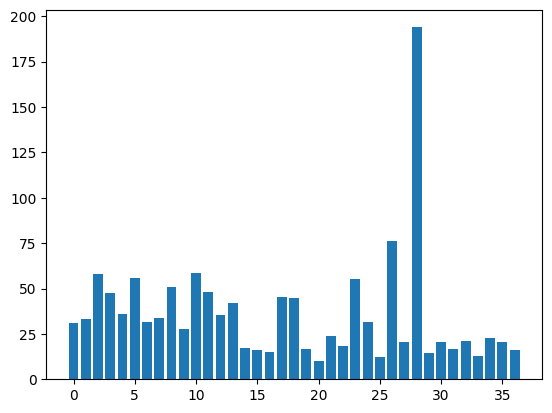

 The number of important features with threshold as 1 :37


In [17]:
for i in range(len(fs1.scores_)):
	print('Feature %d: %f' % (i, fs1.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs1.scores_))], fs1.scores_)
plt.show()

count = 0
for i in fs1.scores_ : 
    if i > 1 : 
        count = count + 1
k=count

print(" The number of important features with threshold as 1 :{}".format(k))
     

In [18]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2,k=k)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [19]:
X_train, X_test, fs = select_features(X_train, y_train, X_test)

In [20]:
X_train

array([[72, 64, 89, ...,  0,  1,  1],
       [66, 74, 61, ...,  0,  1,  0],
       [71, 89, 63, ...,  1,  1,  0],
       ...,
       [84, 69, 70, ...,  1,  0,  1],
       [82, 76, 76, ...,  0,  1,  1],
       [90, 93, 87, ...,  0,  1,  1]], dtype=int64)

#### Model Training

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn import tree


In [22]:
def Dec_tree(X_train,y_train,X_test,y_test):
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, y_train)
  # Prediction
  y_pred = clf.predict(X_test)
  y_test_arr=y_test
  from sklearn.metrics import confusion_matrix,accuracy_score
  accuracy = accuracy_score(y_test,y_pred)
  print('Model accuracy score with Decision Tree', accuracy_score(y_test, y_pred)*100)
  return accuracy*100,clf

In [23]:
def xgboost(X_train,y_train,X_test,y_test,clf):
  #X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=10)
  shape = X_train.shape
  X_train=pd.to_numeric(X_train.values.flatten())
  X_train=X_train.reshape(shape)
  model = XGBClassifier()
  model.fit(X_train, y_train)
  xgb_y_pred  = clf.predict(X_test)
  xgb_accuracy = accuracy_score(y_test,xgb_y_pred)
  print("accuracy=",xgb_accuracy*100)
  return xgb_accuracy*100

In [24]:
print("Without feature Selection : ")
acc1,clf1 = Dec_tree(X_train1,y_train,X_test1,y_test)


print("With feature Selection : ")
acc,clf = Dec_tree(X_train,y_train,X_test,y_test)

print(' ')

Without feature Selection : 
Model accuracy score with Decision Tree 3.15
With feature Selection : 
Model accuracy score with Decision Tree 2.8833333333333333
 


In [25]:
#print("Boosting the Decision Tree  ")
#acc = xgboost(X_train,y_train,X_test,y_test,clf)

In [26]:
# x_new = ['3','5','4','3','5','4','3','5','2','2','5','2','5','4','2','5','5','3','2','5','5','4','2','3','4']
x_new = []
feat = list(X.columns) 
for i in feat:
  print(i)
  val = input("Enter: ") 
  x_new.append(val)
x_new

Acedamic percentage in Operating Systems
percentage in Algorithms
Percentage in Programming Concepts
Percentage in Software Engineering
Percentage in Computer Networks
Percentage in Electronics Subjects
Percentage in Computer Architecture
Percentage in Mathematics
Percentage in Communication skills
Hours working per day
Logical quotient rating
hackathons
coding skills rating
public speaking points
can work long time before system?
self-learning capability?
Extra-courses did
certifications
workshops
talenttests taken?
olympiads
reading and writing skills
memory capability score
Interested subjects
interested career area 
Job/Higher Studies?
Type of company want to settle in?
interested in games
Interested Type of Books
Salary Range Expected
In a Realtionship?
Gentle or Tuff behaviour?
Management or Technical
Salary/work
hard/smart worker
worked in teams ever?
Introvert


['3',
 '5',
 '4',
 '3',
 '5',
 '4',
 '3',
 '5',
 '2',
 '2',
 '5',
 '2',
 '5',
 '4',
 '2',
 '5',
 '5',
 '5',
 '3',
 '2',
 '5',
 '5',
 '4',
 '2',
 '3',
 '4',
 '3',
 '4',
 '3',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1']

In [41]:
new_pred  = clf.predict([x_new])
print(f"Predcition: {categorized_data.loc[new_pred[0]]}")

Predcition: ROLE    Web Developer
Name: 26, dtype: object
